In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.stats as stats
import seaborn as sns

In [3]:
rcParams['pdf.fonttype']=42
rcParams['font.family']='sans-serif'
rcParams['font.size']=10

In [4]:
def qnorm_dataframe( data ):
	"""
	quantile normalize a dataframe with numeric values only!
	"""
	rank_mean = data.stack().groupby(data.rank(method='first').stack().astype(int)).mean()
	qnormed_data    = data.rank(method='min').stack().astype(int).map(rank_mean).unstack()
	return qnormed_data

In [5]:
feats = pd.read_table('./Data/features-bool-deDuped-2918feats-808cells.txt', index_col=0)
feats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 2918 entries, plasma_cell to CDH_VIM_lo
dtypes: bool(2918)
memory usage: 2.3+ MB


In [6]:
bf = pd.read_table('./Data/table_Avana2020Q4_CRISPRcleanR_corrected_all', index_col=0)
qbf = qnorm_dataframe( bf ).T
qbf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 18095 entries, A1BG to ZZZ3
dtypes: float64(18095)
memory usage: 111.6+ MB


In [7]:
data = feats.join(qbf, how='inner')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 21013 entries, plasma_cell to ZZZ3
dtypes: bool(2918), float64(18095)
memory usage: 113.8+ MB


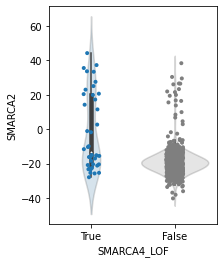

In [8]:
#
# FIG 1E
#

my_order = [True,False]
my_palette = {True: sns.color_palette("tab10")[0], False: sns.color_palette("tab10")[7]}

figure( figsize(3,4))
ax = sns.violinplot( x='SMARCA4_LOF', y='SMARCA2', data=data, order=my_order, palette=my_palette)
for violin in ax.collections[::2]:
    violin.set_alpha(0.2)
sns.stripplot( x='SMARCA4_LOF', y='SMARCA2', data=data, s=4, order=my_order, palette=my_palette)
savefig('./Figures/Fig_1_E.pdf')
savefig('./Figures/Fig_1_E.png')
show()

In [9]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [10]:
sns.color_palette("tab10")[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

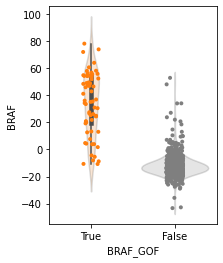

In [11]:
#
# FIG 1F
#

my_order = [True,False]
#my_palette = {True: "orange", False: "gray"}
my_palette = {True: sns.color_palette("tab10")[1], False: sns.color_palette("tab10")[7]}

figure( figsize(3,4))
ax = sns.violinplot( x='BRAF_GOF', y='BRAF', data=data, order=my_order, palette=my_palette)
for violin in ax.collections[::2]:
    violin.set_alpha(0.2)
sns.stripplot( x='BRAF_GOF', y='BRAF', data=data, s=4, order=my_order, palette=my_palette)
savefig('./Figures/Fig_1_F.pdf')
savefig('./Figures/Fig_1_F.png')
show()

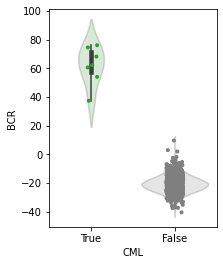

In [12]:
#
# FIG 1G
#

my_order = [True,False]
my_palette = {True: sns.color_palette("tab10")[2], False: sns.color_palette("tab10")[7]}

figure( figsize(3,4))
ax = sns.violinplot( x='CML', y='BCR', data=data, order=my_order, palette=my_palette)
for violin in ax.collections[::2]:
    violin.set_alpha(0.2)
sns.stripplot( x='CML', y='BCR', data=data, s=4, order=my_order, palette=my_palette)
savefig('./Figures/Fig_1_G.pdf')
savefig('./Figures/Fig_1_G.png')
show()

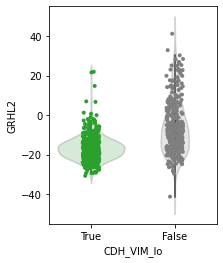

In [13]:
#
# FIG 1H
#

my_order = [True,False]
my_palette = {True: sns.color_palette("tab10")[2], False: sns.color_palette("tab10")[7]}

figure( figsize(3,4))
ax = sns.violinplot( x='CDH_VIM_lo', y='GRHL2', data=data, order=my_order, palette=my_palette)
for violin in ax.collections[::2]:
    violin.set_alpha(0.2)
sns.stripplot( x='CDH_VIM_lo', y='GRHL2', data=data, s=4, order=my_order, palette=my_palette)
savefig('./Figures/Fig_1_H.pdf')
savefig('./Figures/Fig_1_H.png')
show()

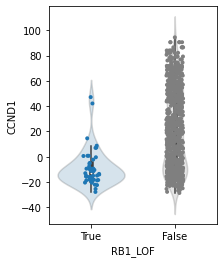

In [14]:
#
# FIG 1I
#

my_order = [True,False]
my_palette = {True: sns.color_palette("tab10")[0], False: sns.color_palette("tab10")[7]}

figure( figsize(3,4))
ax = sns.violinplot( x='RB1_LOF', y='CCND1', data=data, order=my_order, palette=my_palette)
for violin in ax.collections[::2]:
    violin.set_alpha(0.2)
sns.stripplot( x='RB1_LOF', y='CCND1', data=data, s=4, order=my_order, palette=my_palette)
savefig('./Figures/Fig_1_I.pdf')
savefig('./Figures/Fig_1_I.png')
show()